# UMAP(Uniform Manifold Approximation)
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

In [1]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

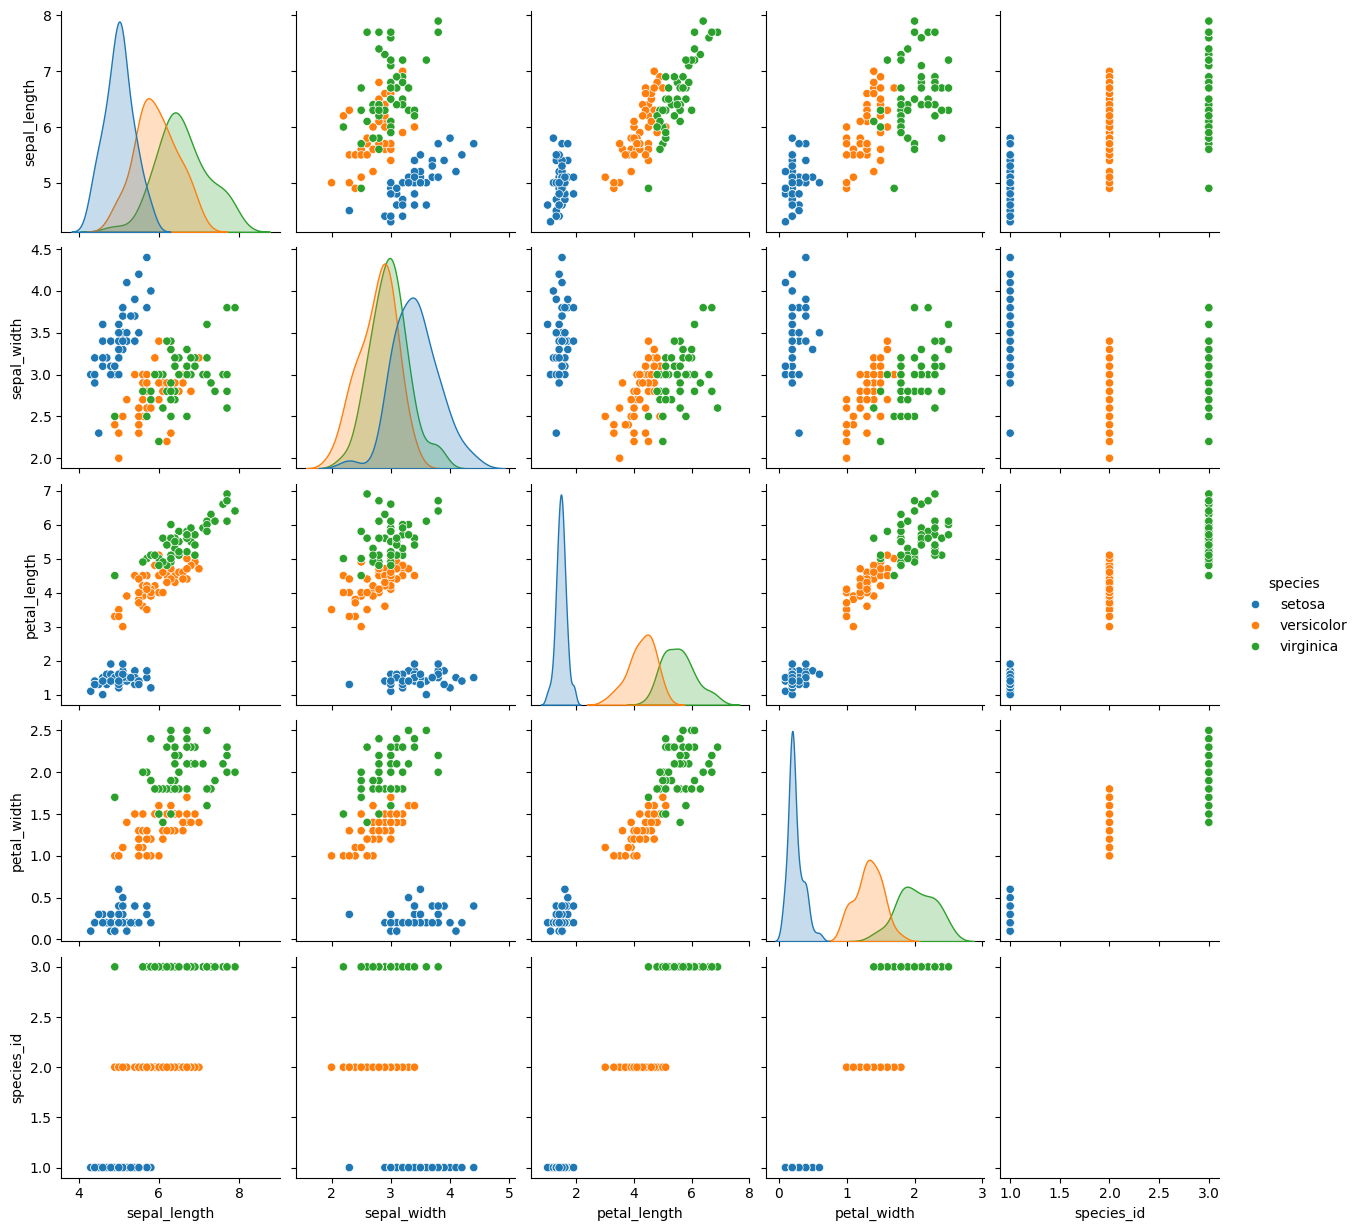

In [2]:
import seaborn as sns
sns.pairplot(df,hue='species')

## Project data into 2D with t-SNE and px.scatter

In [3]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

## Project data into 3D with t-SNE and px.scatter_3d

In [4]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

## Projections With UMAP

In [5]:
!pip install umap-learn

In [7]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [8]:
fig_3d.show()

---

# UMAP on World Countries Dataset

In [11]:
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
# Load world dataset (gapminder from plotly)
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [16]:
# Take the latest year (most recent data)
df_latest = df[df['year'] == df['year'].max()]
df_latest.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [17]:
# Select numerical features to embed
features = df_latest[['gdpPercap', 'lifeExp', 'pop']]
features

,gdpPercap,lifeExp,pop
11,974.580338,43.828,31889923
23,5937.029526,76.423,3600523
35,6223.367465,72.301,33333216
47,4797.231267,42.731,12420476
59,12779.379640,75.320,40301927
...,...,...,...
1655,2441.576404,74.249,85262356
1667,3025.349798,73.422,4018332
1679,2280.769906,62.698,22211743
1691,1271.211593,42.384,11746035


In [18]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
umapper = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    random_state=42
)

embedding = umapper.fit_transform(features_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [20]:
# Add UMAP result back to dataframe
df_latest['UMAP-1'] = embedding[:, 0]
df_latest['UMAP-2'] = embedding[:, 1]

/tmp/ipython-input-2072906565.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2072906565.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



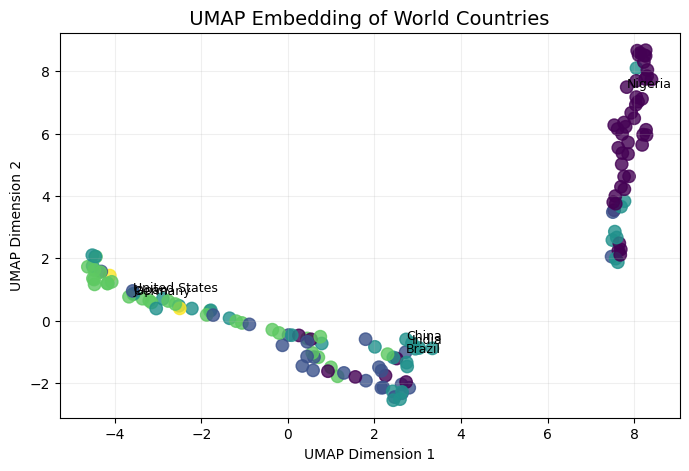

In [25]:
#  Attractive Scatter Visualization
plt.figure(figsize=(8,5))
scatter = plt.scatter(
    df_latest['UMAP-1'],
    df_latest['UMAP-2'],
    c=df_latest['continent'].astype('category').cat.codes,
    s=80,
    alpha=0.8
)
plt.title(" UMAP Embedding of World Countries ", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(alpha=0.2)

# Label some major countries
for i, country in df_latest.iterrows():
    if country['country'] in ["India", "China", "United States", "Brazil", "Nigeria", "Japan", "Germany"]:
        plt.text(country['UMAP-1'], country['UMAP-2'], country['country'], fontsize=9)

plt.show()